# Задача регрессии

В случае задач машинного обучения с учителем существует какое-то количество размеченных данных, данных, для которых определен корректный ответ и корректное предсказание. Мы пытаемся обучить нашу модель на этих данных и потом сделать предсказание на новых данных, которых мы еще не видели. Далее когда поступают новые данные, не размеченные, наша обученная модель пытается предсказать для них ответ.

В этом разделе мы посмотрим на одну из задач машинного обучения с учителем - это задача регрессии.

**Задача регрессии** (прогнозирования) – построение модели, способной предсказывать численную величину на основе набора признаков объекта.

**Регрессия. Постановка задачи.**

Есть обучающая выборка, в которой представлены объекты в виде из признакового описания (вектор признаков) и значения целевой переменной (непрерывная переменная).

Алгоритм регрессии для каждого нового объекта (его признакового описания) прогнозирует значение целевой переменной.

**Ответ в задачах регресии является числовым из непрерывного диапазона, в отличии от задач классификации, где ответ дискретный.**

# Линейная регрессия

Самый простой способ посчитать регрессиию, предположить, что есть некая линейная зависимость от признаков.

$$f_{w,b}(x) = wx + b$$

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Мы ещё отдельно разберём как считать ошибки, но, упрощённо говоря, достаточно считать квадрат разности между настоящими и посчитанными значениями.

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Подбирать параметры поможет градиентный спуск.

$$w \leftarrow w - \alpha \frac{\partial J}{\partial w}$$

$$b \leftarrow b - \alpha \frac{\partial J}{\partial b}$$

Для него нужно посчитать производные ошибки по параметрам.

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})
$$

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})X^{(i)}
$$

In [23]:
class LinearRegression() :

    def __init__(self, learning_rate, iterations) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = 0.0
        self.b = 0.0

    def fit(self, X, Y) :
        self.X = X
        self.Y = Y
        self.m = X.shape[0]

        for i in range(self.iterations) :
            self.update_weights()
        # return self

    def update_weights(self) :
            Y_pred = self.w * self.X + self.b
            error = Y_pred - self.Y
            dw = (1 / self.m) * np.sum(error * self.X)
            db = (1 / self.m) * np.sum(error)
            
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
            # а тут предсказание значений
        return self.w * X + self.b

In [24]:
print("w =", model.w)
print("b =", model.b)

w = 3.001332515850539e-12
b = 71022.49999999997


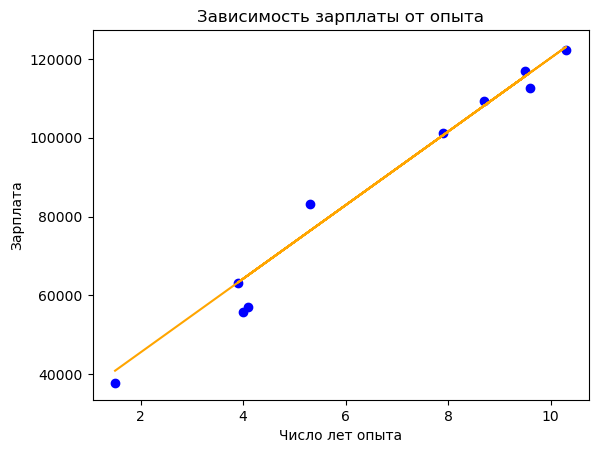

In [26]:
df = pd.read_csv(r"C:\Users\Elena\Documents\2025\МИФИ 2 сем\Skillfactory\Классическое маш обуч\Лекция3-Ноут\salary_data.csv" )

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )

# Нормализация
X_mean = X_train.mean()
X_std = X_train.std()
X_train_norm = ((X_train - X_mean) / X_std).flatten()
X_test_norm = ((X_test - X_mean) / X_std).flatten()

model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X_train_norm, Y_train)

Y_pred = model.predict(X_test_norm)

plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, Y_pred, color = 'orange')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')

plt.show()

In [27]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_pred)
print(f"R² на тестовой выборке: {r2:.4f}")

R² на тестовой выборке: 0.9749
